In [1]:
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
%pwd

u'/Users/kivan/repos/DSSG-Paratransit/Access_Analysis_Rproject/Scripts'

In [2]:
bruns = pd.read_csv('../data/4mo_broken_buses.csv', index_col=0)
bruns

,Run,ServiceDate
0,9705,0015-01-01
1,9708,0015-01-01
2,9716,0015-01-01
3,8702,0015-01-01
4,8706,0015-01-01
5,8711,0015-01-01
6,8730,0015-01-01
7,8712,0015-01-01
8,8729,0015-01-01
9,8714,0015-01-01


In [3]:
dates = bruns.ServiceDate.drop_duplicates()
dates

0       0015-01-01
16      0015-01-31
17      0015-02-01
18      0015-02-08
19      0015-02-22
20      0015-03-28
21      0015-04-11
23      0015-04-21
25      0015-01-05
26      0015-01-09
27      0015-01-13
28      0015-01-15
29      0015-01-25
30      0015-02-03
31      0015-02-05
32      0015-02-07
33      0015-02-20
34      0015-03-09
35      0015-03-13
36      0015-03-15
37      0015-03-18
38      0015-04-01
39      0015-04-05
40      0015-04-06
41      0015-04-09
42      0015-04-16
43      0015-04-19
44      0015-04-30
46      0015-01-20
47      0015-03-02
           ...    
232     0015-03-08
233     0015-03-14
236     0015-03-20
239     0015-04-12
240     0015-04-18
241     0015-04-22
245     0015-01-24
248     0015-02-21
258     0015-01-17
274     0015-03-03
295     0015-01-18
300     0015-03-11
309     0015-03-01
369     0015-03-26
386     0015-01-14
426     0015-04-03
467     0015-01-21
468     0015-02-02
2413    0015-02-15
2414    0015-04-26
2420    0015-04-04
2422    0015

In [4]:
dates = dates.apply(lambda x: '2' + x[1:])
dates.index = range(len(dates))
dates

0      2015-01-01
1      2015-01-31
2      2015-02-01
3      2015-02-08
4      2015-02-22
5      2015-03-28
6      2015-04-11
7      2015-04-21
8      2015-01-05
9      2015-01-09
10     2015-01-13
11     2015-01-15
12     2015-01-25
13     2015-02-03
14     2015-02-05
15     2015-02-07
16     2015-02-20
17     2015-03-09
18     2015-03-13
19     2015-03-15
20     2015-03-18
21     2015-04-01
22     2015-04-05
23     2015-04-06
24     2015-04-09
25     2015-04-16
26     2015-04-19
27     2015-04-30
28     2015-01-20
29     2015-03-02
          ...    
90     2015-03-08
91     2015-03-14
92     2015-03-20
93     2015-04-12
94     2015-04-18
95     2015-04-22
96     2015-01-24
97     2015-02-21
98     2015-01-17
99     2015-03-03
100    2015-01-18
101    2015-03-11
102    2015-03-01
103    2015-03-26
104    2015-01-14
105    2015-04-03
106    2015-01-21
107    2015-02-02
108    2015-02-15
109    2015-04-26
110    2015-04-04
111    2015-01-03
112    2015-03-07
113    2015-01-11
114    201

In [5]:
bruns.ServiceDate = bruns.ServiceDate.apply(lambda x: '2' + x[1:])

In [6]:
count = dates.apply(lambda x: len(bruns.ServiceDate[bruns.ServiceDate == x]))
count.name = 'Count'

In [7]:
count

0      18
1      14
2      20
3      38
4      20
5      14
6      21
7      42
8      45
9      25
10     49
11     29
12     37
13     39
14     37
15     15
16     28
17     37
18     32
19     18
20     27
21     33
22     25
23     30
24     26
25     25
26     21
27     42
28     43
29     32
       ..
90     24
91      8
92     28
93     22
94     20
95     24
96     25
97     13
98     14
99     39
100    31
101    30
102    28
103    24
104    25
105    23
106    32
107    33
108    15
109    42
110    11
111    17
112    12
113    24
114    14
115    15
116    13
117    10
118    20
119    15
Name: Count, dtype: int64

In [8]:
countFrame = pd.concat([dates, count],axis=1)
countFrame[countFrame.Count > 40]

,ServiceDate,Count
7,2015-04-21,42
8,2015-01-05,45
10,2015-01-13,49
27,2015-04-30,42
28,2015-01-20,43
47,2015-01-06,48
48,2015-01-08,41
61,2015-01-07,46
67,2015-04-24,50
69,2015-03-12,58


In [9]:
countFrame.ServiceDate = pd.to_datetime(countFrame.ServiceDate)
countFrame.sort('ServiceDate', inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [10]:
%matplotlib inline

In [11]:
print len(countFrame.ServiceDate)
print len(countFrame.Count)

120
120


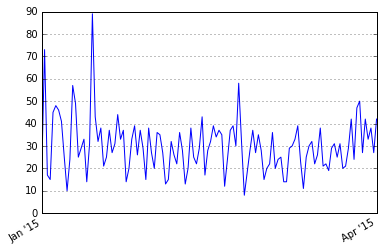

In [12]:
fig, ax = plt.subplots()
plt.plot_date(countFrame.ServiceDate,countFrame.Count, '-')
months = MonthLocator(range(1, 13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months) 
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
#ax.xaxis.grid(False, 'major')
#ax.xaxis.grid(True, 'minor')
ax.grid(True)
fig.autofmt_xdate()
plt.show()